In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease.csv')

In [14]:
print(df.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [18]:
print(df.describe())

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000    

In [22]:
print(df.isnull().sum()) # Checking for missing values

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [3]:
duplicates = df.duplicated().sum() #removing duplicate rows
df.drop_duplicates(inplace=True)
print(f'Removed {duplicates} duplicate rows.')

Removed 23899 duplicate rows.


In [9]:
missing_values = df.isnull().sum()
print(f'Missing values in each column before handling:\n{missing_values}')

Missing values in each column before handling:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [39]:
df.fillna(df.median(), inplace=True) # Filling missing values (if any) with the median for numeric columns

In [5]:
categorical_columns = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# Convert specified columns to categorical
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Explicitly set the category order for 'Diabetes'
df['Diabetes'] = df['Diabetes'].astype('category').cat.reorder_categories([0, 1, 2], ordered=True)

# Convert 'Age', 'Education', and 'Income' columns to categorical data type
df['Age'] = df['Age'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Income'] = df['Income'].astype('category')

In [12]:
final_missing_values = df.isnull().sum()
final_duplicates = df.duplicated().sum()

print(f'Final missing values after handling:\n{final_missing_values}')
print(f'Final duplicate rows after cleaning: {final_duplicates}')

Final missing values after handling:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Final duplicate rows after cleaning: 0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  229781 non-null  category
 1   HighBP                229781 non-null  category
 2   HighChol              229781 non-null  category
 3   CholCheck             229781 non-null  category
 4   BMI                   229781 non-null  int64   
 5   Smoker                229781 non-null  category
 6   Stroke                229781 non-null  category
 7   Diabetes              229781 non-null  category
 8   PhysActivity          229781 non-null  category
 9   Fruits                229781 non-null  category
 10  Veggies               229781 non-null  category
 11  HvyAlcoholConsump     229781 non-null  category
 12  AnyHealthcare         229781 non-null  category
 13  NoDocbcCost           229781 non-null  category
 14  GenHlth               229781 non-null  in

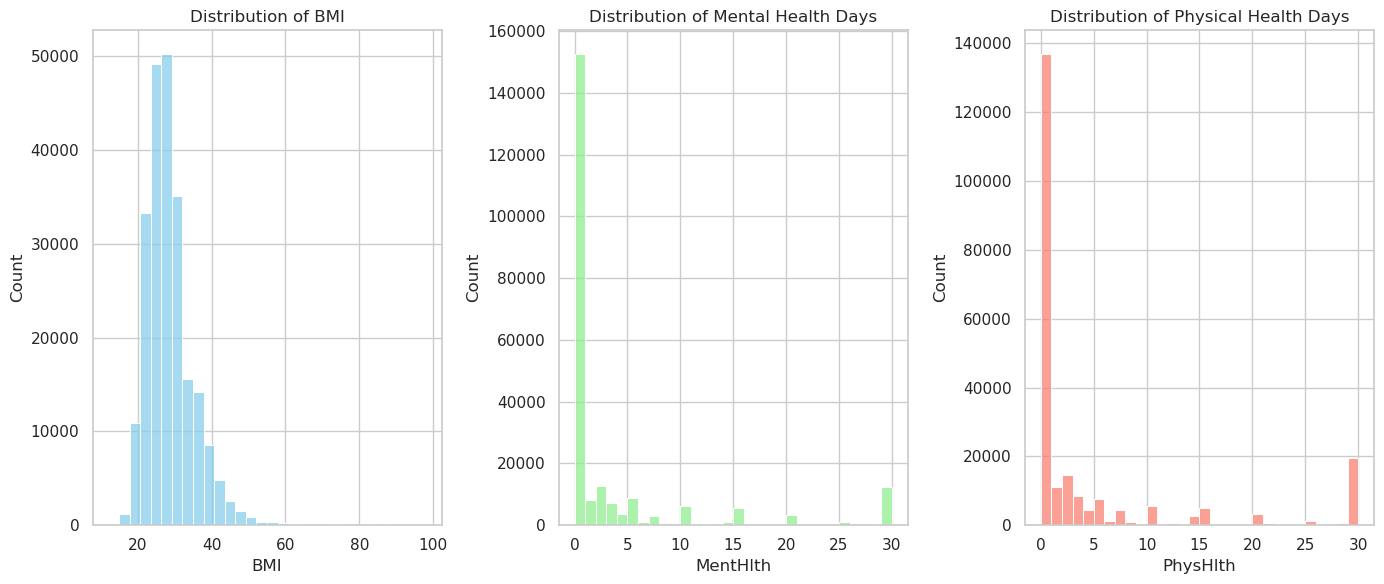

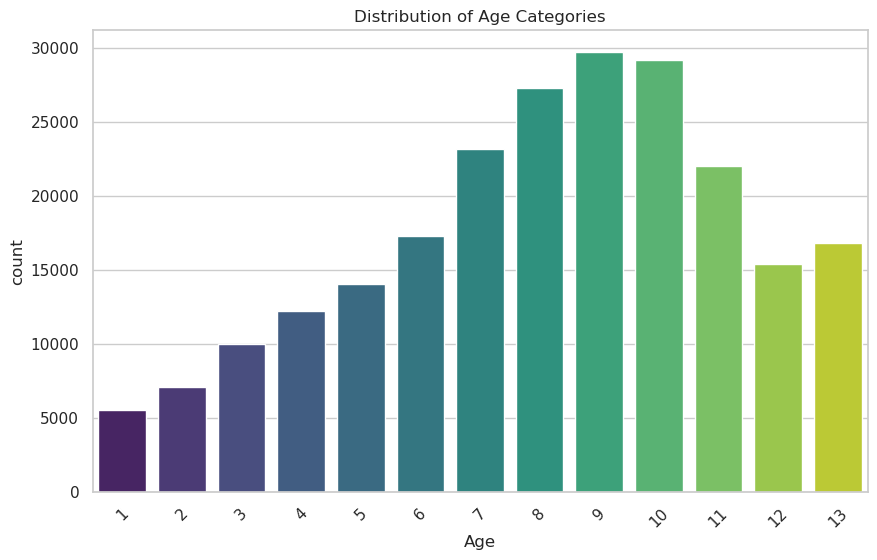

In [7]:
# Set plot styles
sns.set(style="whitegrid")

# Plotting Histograms for numerical variables: BMI, MentHlth, PhysHlth
plt.figure(figsize=(14, 6))

# BMI distribution
plt.subplot(1, 3, 1)
sns.histplot(df['BMI'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of BMI')

# MentHlth distribution
plt.subplot(1, 3, 2)
sns.histplot(df['MentHlth'], kde=False, bins=30, color='lightgreen')
plt.title('Distribution of Mental Health Days')

# PhysHlth distribution
plt.subplot(1, 3, 3)
sns.histplot(df['PhysHlth'], kde=False, bins=30, color='salmon')
plt.title('Distribution of Physical Health Days')

plt.tight_layout()
plt.show()

# Bar chart for Age distribution (since Age is categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Distribution of Age Categories')
plt.xticks(rotation=45)
plt.show()

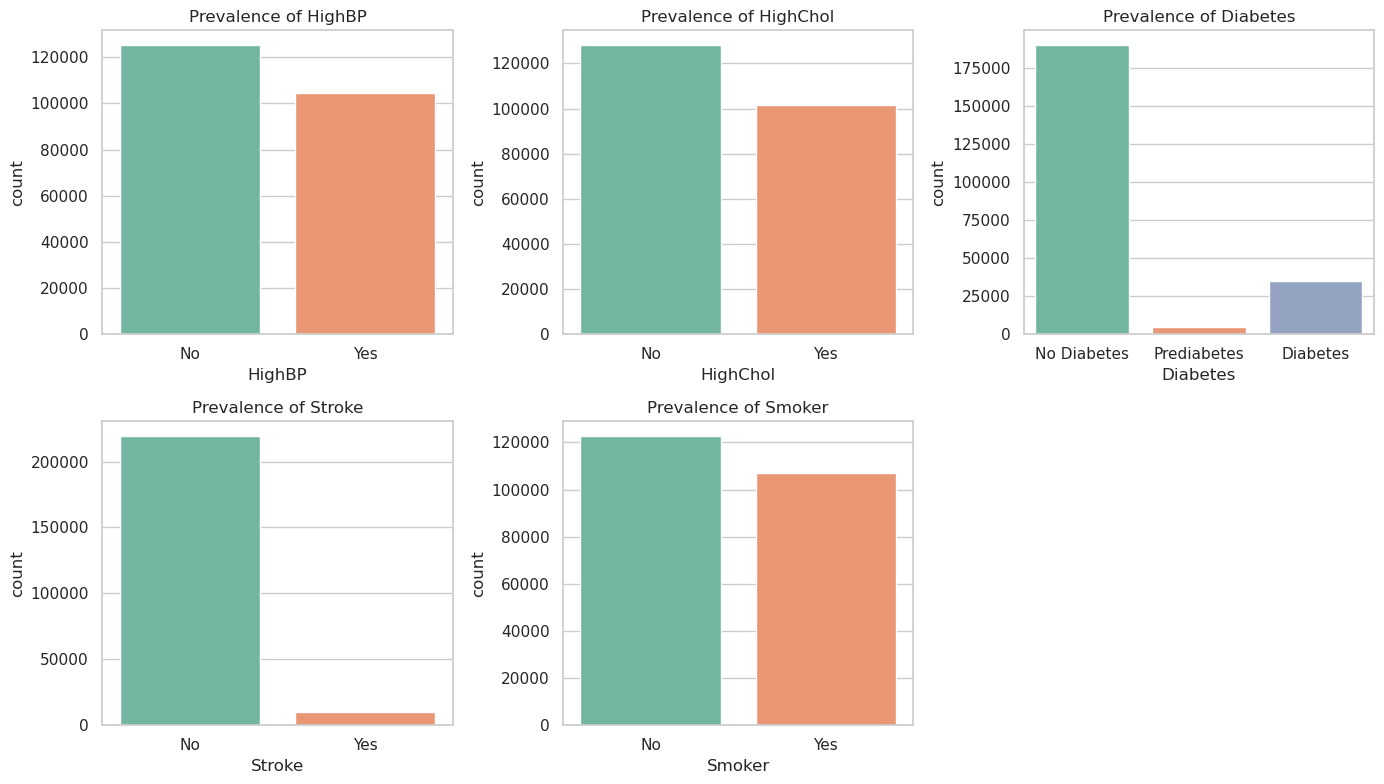

In [9]:
# Plotting bar charts for the prevalence of health conditions: HighBP, HighChol, and others
health_conditions = ['HighBP', 'HighChol', 'Diabetes', 'Stroke', 'Smoker']

plt.figure(figsize=(14, 8))

for i, condition in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    if condition == 'Diabetes':
        sns.countplot(x=condition, data=df, palette='Set2')
        plt.title(f'Prevalence of {condition}')
        plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
    else:
        sns.countplot(x=condition, data=df, palette='Set2')
        plt.title(f'Prevalence of {condition}')
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


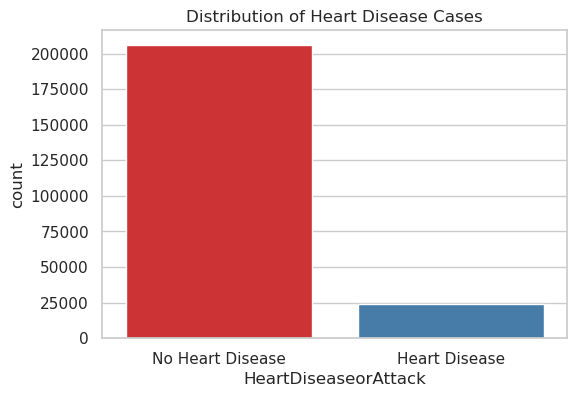

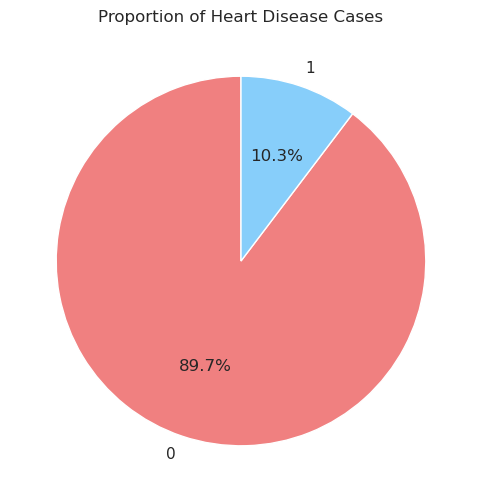

In [11]:
# Bar chart for the distribution of heart disease cases
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set1')
plt.title('Distribution of Heart Disease Cases')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# Pie chart for the distribution of heart disease cases
plt.figure(figsize=(6, 6))
df['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Proportion of Heart Disease Cases')
plt.ylabel('')  # Remove y-label for better presentation
plt.show()


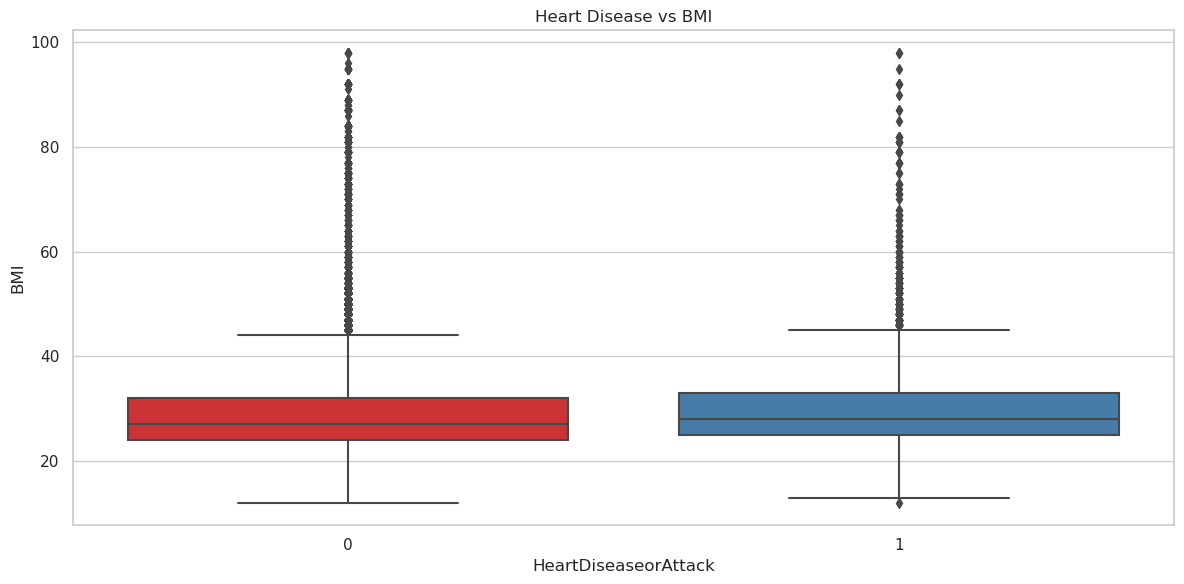

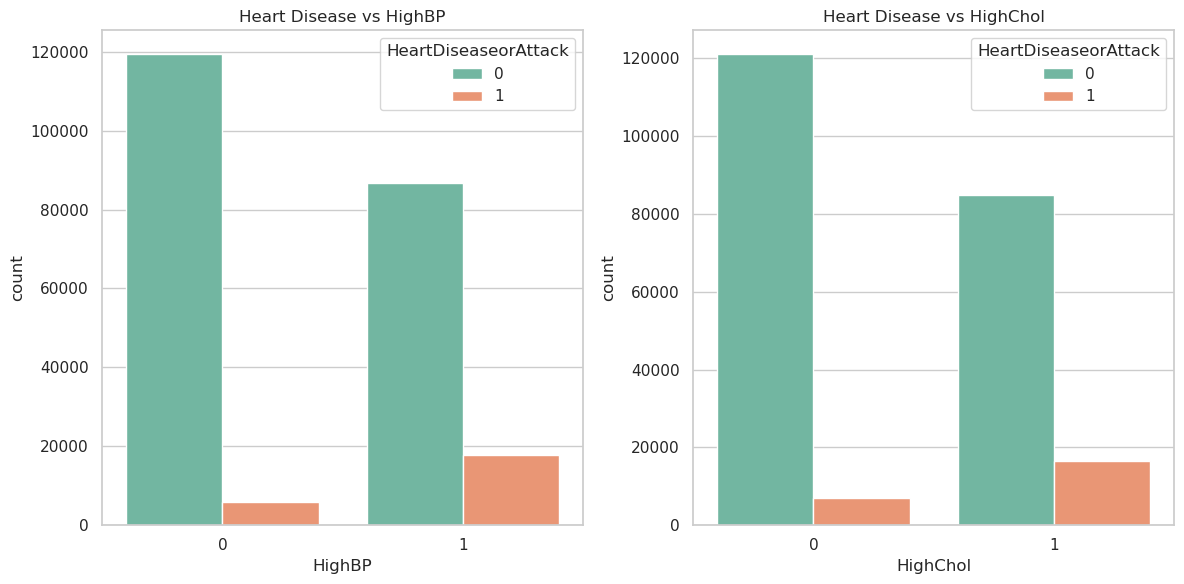

In [15]:
# Separate the variables into categorical and numeric
numeric_conditions = ['BMI']  # Keep only numeric variables
categorical_conditions = ['HighBP', 'HighChol']  # Use countplot for categorical variables

# Plot numeric variables with boxplot
plt.figure(figsize=(12, 6))
for i, condition in enumerate(numeric_conditions, 1):
    plt.subplot(1, len(numeric_conditions), i)
    sns.boxplot(x='HeartDiseaseorAttack', y=condition, data=df, palette='Set1')
    plt.title(f'Heart Disease vs {condition}')
    
plt.tight_layout()
plt.show()

# Plot categorical variables with countplot
plt.figure(figsize=(12, 6))
for i, condition in enumerate(categorical_conditions, 1):
    plt.subplot(1, len(categorical_conditions), i)
    sns.countplot(x=condition, hue='HeartDiseaseorAttack', data=df, palette='Set2')
    plt.title(f'Heart Disease vs {condition}')
    
plt.tight_layout()
plt.show()


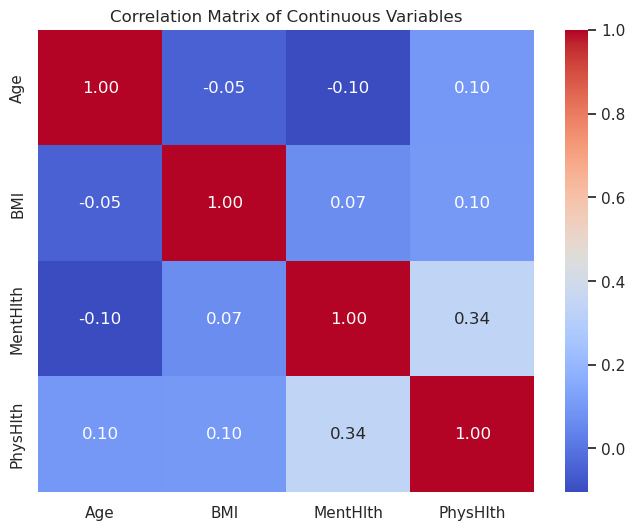

In [17]:
# Calculating the correlation matrix
corr_matrix = df[['Age', 'BMI', 'MentHlth', 'PhysHlth']].corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

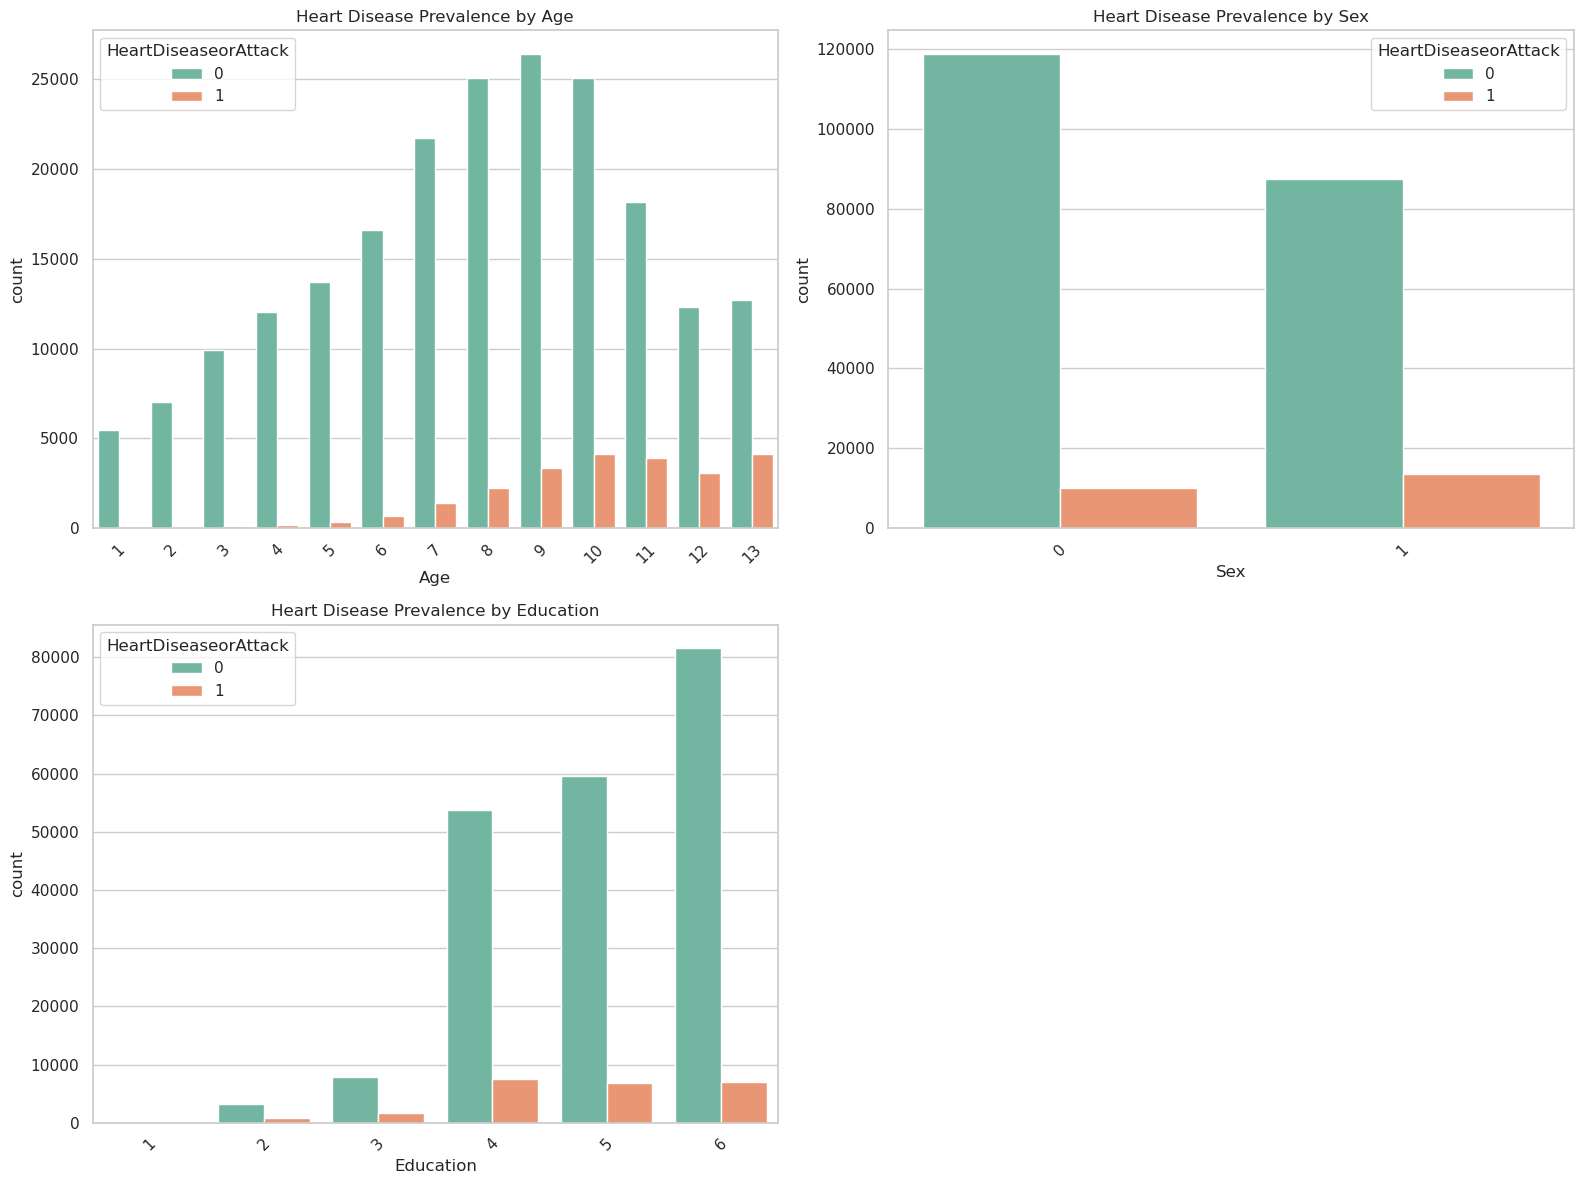

In [21]:
# Grouping data to analyze heart disease across demographic groups
demographic_groups = ['Age', 'Sex', 'Education']

plt.figure(figsize=(16, 12))
for i, group in enumerate(demographic_groups, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=group, hue='HeartDiseaseorAttack', data=df, palette='Set2')
    plt.title(f'Heart Disease Prevalence by {group}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()